In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np

In [2]:
keras.__version__

'2.12.0'

In [3]:
df=pd.read_csv('wine.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [8]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [12]:
df['quality_enc']=np.where(df['quality']=='bad',0,1)

In [14]:
df.drop(['quality'],axis=1,inplace=True)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_enc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler 

In [21]:
Xtr,Xte,ytr,yte=tts(X,y,random_state=42,test_size=0.3)

In [25]:
scaler=StandardScaler()
Xtr=scaler.fit_transform(Xtr)
Xte=scaler.transform(Xte)

In [26]:
from tensorflow.keras.models import Sequential as seq
from tensorflow.keras.layers import Dense as dense

In [27]:
Xtr.shape,ytr.shape

((1119, 11), (1119,))

In [85]:
Xtr.shape[1:]

(11,)

In [104]:
model=seq()
model.add(dense(30,activation='relu',input_shape=Xtr.shape[1:]))
model.add(dense(10,activation='relu'))
model.add(dense(1,activation='softmax'))

In [105]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                360       
                                                                 
 dense_22 (Dense)            (None, 10)                310       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=1e-3),metrics=['accuracy'])

In [107]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [108]:
import os
import time
def get_log_path(log_dir='logs/fit'):
    file_name=time.strftime('logs_%d_%m_%Y_%H_%M_%S')
    logs_path=os.path.join(log_dir,file_name)
    print(f'Saving logs at {logs_path}')
    return logs_path
tens=TensorBoard(log_dir=get_log_path())

Saving logs at logs/fit\logs_13_04_2024_14_12_09


In [109]:
check=ModelCheckpoint('best_model_ckpt.keras',save_best_only=True)

In [110]:
early=EarlyStopping(patience=5,restore_best_weights=True)

In [119]:
history=model.fit(Xtr,ytr,batch_size=32,callbacks=[check,early,tens],epochs=30)

Epoch 1/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.5255
Epoch 2/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.5255
Epoch 3/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.5255
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.5255
Epoch 5/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.5255
Epoch 6/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.5255
Epoch 7/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.5255
Epoch 8/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.5255
Epoch 9/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.5255
Epoch 10/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.5255
Epoch 11/30
35/35 [

In [120]:
df=pd.DataFrame(history.history)

In [121]:
df

,loss,accuracy
0,0.452902,0.525469
1,0.449955,0.525469
2,0.448571,0.525469
3,0.446897,0.525469
4,0.446871,0.525469
5,0.446657,0.525469
6,0.442943,0.525469
7,0.443031,0.525469
8,0.441085,0.525469
9,0.439278,0.525469


In [122]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 35}

<Axes: >

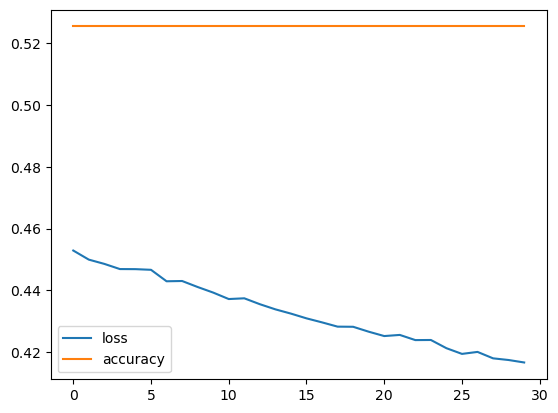

In [123]:
df.plot()

In [125]:
y_pred=model.predict(Xte)

15/15 [==============================] - 0s 1ms/step


In [126]:
from sklearn.metrics import accuracy_score as acs

In [127]:
acs(y_pred,yte)

0.55625